In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
# a

df = pd.read_csv('winequality_red.csv', index_col = 0)
inputs = df.drop('quality', axis = 1)
outputs = df['quality']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# 4b

# splits into train/test (75/25 split)

X_train, X_test, y_train, y_test = train_test_split(inputs.values, outputs.values, test_size=0.25)

# splits into test/val split (10/15 split)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4)

In [4]:
# 4c

# Linear Regression Class

class LinearRegression():
    
    def __init__(self, X_train, y_train):
        self.beta = self.fit(X_train, y_train)
        
    def fit(self, X_train, y_train):
        return np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)
        
    def predict(self, X_test):
        return np.matmul(X_test, self.beta)
    
# class fits the model

LRModel = LinearRegression(X_train, y_train)

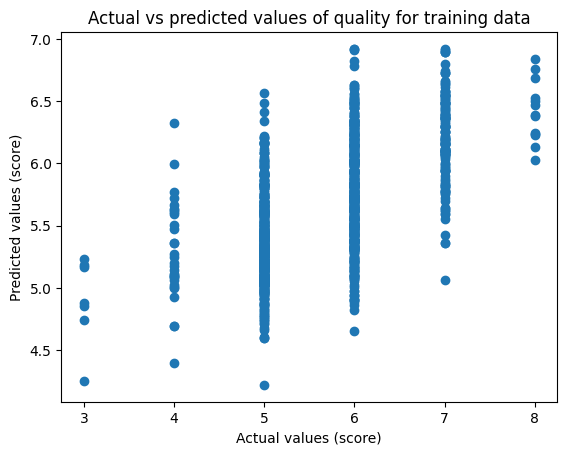

"\nWe can interpret the data by looking at the general trend of the data, and whether it follows along the x = y line. \nIt appears that the data looks approximately linear, though the graph doesn't follow exactly y =x, as for the lower scores\n(around 3-4), it overpredicts and for  higher values (7-8), it underpredicts. There is a large range in the predicted score\nfor each actual score, which implies that the linear regression doesn't completely predict the score. \n\n"

In [5]:
# 4d

plt.scatter(y_train, LRModel.predict(X_train))
plt.xlabel('Actual values (score)')
plt.ylabel('Predicted values (score)')
plt.title('Actual vs predicted values of quality for training data')
plt.show()
"""
We can interpret the data by looking at the general trend of the data, and whether it follows along the x = y line. 
It appears that the data looks approximately linear, though the graph doesn't follow exactly y =x, as for the lower scores
(around 3-4), it overpredicts and for  higher values (7-8), it underpredicts. There is a large range in the predicted score
for each actual score, which implies that the linear regression doesn't completely predict the score. 

"""

In [6]:
# 4e

def rms_error(predictions, actual):
    return math.sqrt((1/len(predictions))*sum([(predictions[i] - actual[i])**2 for i in range(len(predictions))]))

print('Train error: ' + str(rms_error(y_train, LRModel.predict(X_train))))
print('Test error: ' + str(rms_error(y_test, LRModel.predict(X_test))))

Train error: 0.6217376227292978
Test error: 0.6576635081307128


In [7]:
# 4f

beta = np.array([np.random.normal(0.07, 0.001) for i in range(11)])
step_size = 1e-12 
num_iter = 200
values = list(range(len(X_train)))

for i in range(num_iter):
    random.shuffle(values)
    for i in values:
        beta = beta - step_size*2*(y_train[i] - np.matmul(X_train[i], beta))*X_train[i]

In [8]:
print('Train error: ' + str(rms_error(y_train, np.matmul(X_train, beta))))
print('Test error: ' + str(rms_error(y_test, np.matmul(X_test, beta))))

Train error: 3.105893068294804
Test error: 2.9875354482922147
